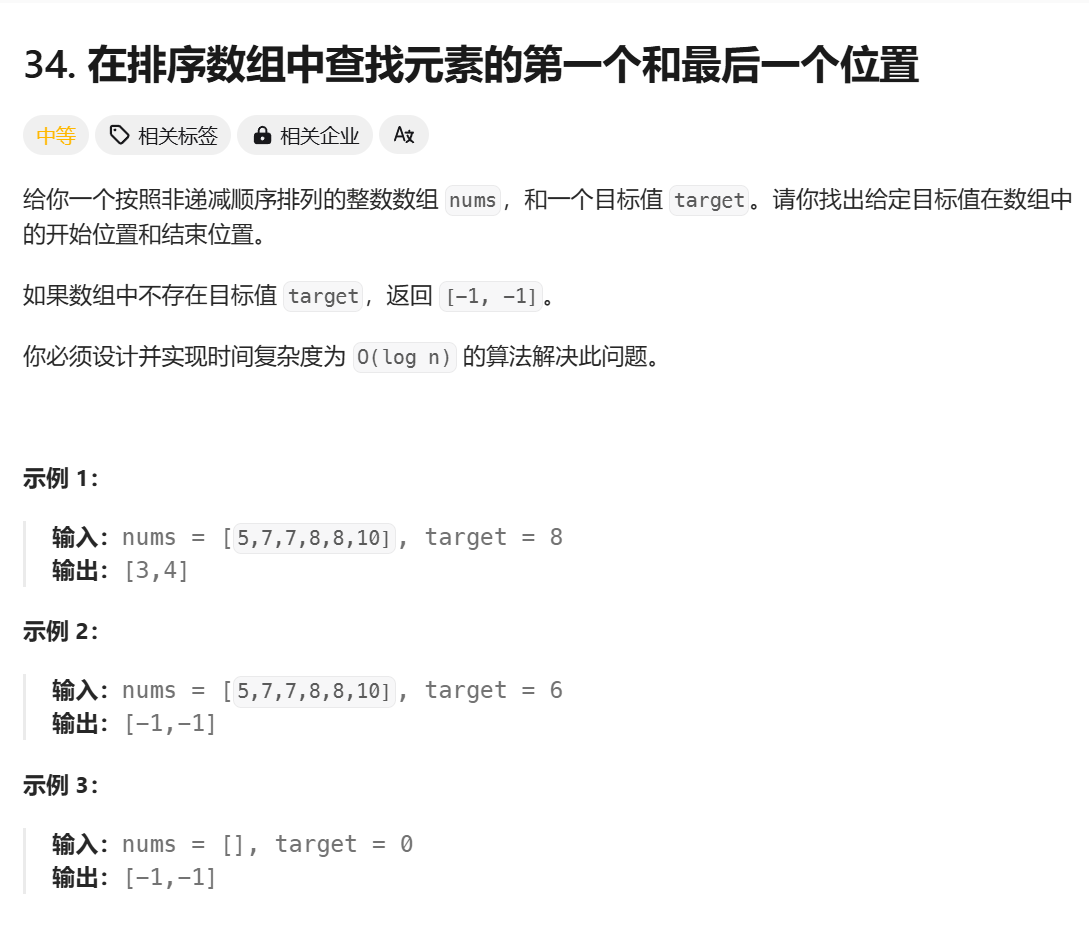

### 先随便找到一个值
- 然后从这个开始向前或者向后去找
- 怎么找肯定不能遍历
- 我们要从这个元素作为开头或者结尾再次二分查找？？？？
### 或者使用二分查找的排除思路
- 如果不是该元素就直接将之前或者后面的排除
- 如果是该元素呢
  - 就再找直到不是该元素
  - 然后排除不是的片段
  - 再找如果\
### 结合起来
- 先找到一个对的
- 然后左右再开始二分排除
  - 如果左边是对的
    - 判断如果左边是不对的直接返回
      -如果左边是对的 区间变化为left-对的
  - 如果左边找到不对的
    - 区间变为不对的-右边

In [21]:
from typing import List

class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        size = len(nums)
        left, right = 0, size - 1
        # 小于的判断条件使得最后left与right位于当前元素
        while left < right :
            mid = (left + right) // 2
            if nums[mid] > target:
                right = mid - 1
            elif nums[mid] < target:
                left = mid + 1
            elif nums[mid] == target:
                left = mid
                break

        # 直接没找到 或者本来啥也没有
        if nums == []:
            return [-1,-1]
        elif nums[left] != target:
            return [-1, -1]
        # 先初始化结果
        res = [left, left]
        res[0] = self.search_left(nums, 0, left, target)
        res[1] = self.search_right(nums, left, size - 1, target)
        return res

    # 开始找左边的元素开头
    def search_left(self, nums, left, right, target):
        while left < right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid + 1
        return left
                
    # 找右边的元素结尾
    def search_right(self, nums, left, right, target):
        while left < right:
            mid = (left + right) // 2
            if nums[mid] > target:
                right = mid - 1
        return right


a = Solution()
a.searchRange([5,7,7,8,8,10], 8)


[3, 3]

## 感觉思路有问题
## 没那么自动



In [23]:
from typing import List

class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        left, right = 0, len(nums) - 1
        first, last = -1, -1

        # 找第一个等于target的位置
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid + 1
            elif nums[mid] > target:
                right = mid - 1
            else:
                first = mid
                right = mid - 1  # 重点关注

        left, right = 0, len(nums) - 1
        # 找第二个
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid + 1
            elif nums[mid] > target:
                right = mid - 1
            else:
                last = mid
                left = mid + 1  # 重点关注
        return [first, last]
    

        
a = Solution()
a.searchRange([5,7,7,8,8,10], 8)
 


[3, 4]